In [1]:
# Cell 1: Import libraries and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('Customer_Sentiment.csv')
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())


Dataset shape: (25000, 13)

First 5 rows:
   customer_id  gender age_group   region product_category purchase_channel  \
0            1    male       60+    north       automobile           online   
1            2   other     46-60  central            books           online   
2            3  female     36-45     east           sports           online   
3            4  female     18-25  central        groceries           online   
4            5  female     18-25     east      electronics           online   

               platform  customer_rating  \
0              flipkart                1   
1      swiggy instamart                5   
2  facebook marketplace                1   
3                 zepto                2   
4                 croma                3   

                               review_text sentiment  response_time_hours  \
0      very disappointed with the quality.  negative                   46   
1       fast delivery and great packaging.  positive            

In [2]:
# Cell 2: Basic statistics and target confirmation
print("=== TARGET CLASS CONFIRMATION ===")
print("Unique sentiment values:", df['sentiment'].unique())
print("Sentiment value counts:")
print(df['sentiment'].value_counts())

# Confirm sentiment is suitable classification target
target_col = 'sentiment'
print(f"\n✓ '{target_col}' is a valid classification target with 3 classes")
print(f"✓ Multi-class classification task (positive/neutral/negative)")

print("\n=== BASIC STATISTICS ===")
print(df.describe(include='all'))


=== TARGET CLASS CONFIRMATION ===
Unique sentiment values: ['negative' 'positive' 'neutral']
Sentiment value counts:
sentiment
positive    9978
negative    9937
neutral     5085
Name: count, dtype: int64

✓ 'sentiment' is a valid classification target with 3 classes
✓ Multi-class classification task (positive/neutral/negative)

=== BASIC STATISTICS ===
         customer_id gender age_group region product_category  \
count   25000.000000  25000     25000  25000            25000   
unique           NaN      3         5      5                9   
top              NaN   male     46-60   west        groceries   
freq             NaN   8385      5059   5081             2858   
mean    12500.500000    NaN       NaN    NaN              NaN   
std      7217.022701    NaN       NaN    NaN              NaN   
min         1.000000    NaN       NaN    NaN              NaN   
25%      6250.750000    NaN       NaN    NaN              NaN   
50%     12500.500000    NaN       NaN    NaN              Na

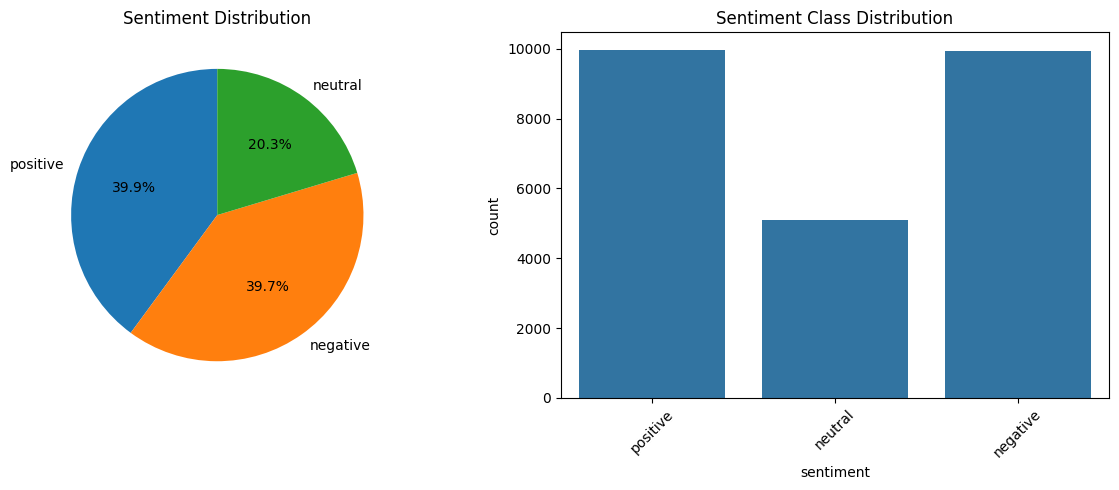

Class distribution details:
sentiment
positive    9978
negative    9937
neutral     5085
Name: count, dtype: int64

Class imbalance ratio (neg:neu:pos): 9937:5085:9978


In [3]:
# Cell 3: Target class distribution visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sentiment_counts = df['sentiment'].value_counts()
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='sentiment', order=['positive', 'neutral', 'negative'])
plt.title('Sentiment Class Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Class distribution details:")
print(sentiment_counts)
print(f"\nClass imbalance ratio (neg:neu:pos): {sentiment_counts['negative']}:{sentiment_counts['neutral']}:{sentiment_counts['positive']}")


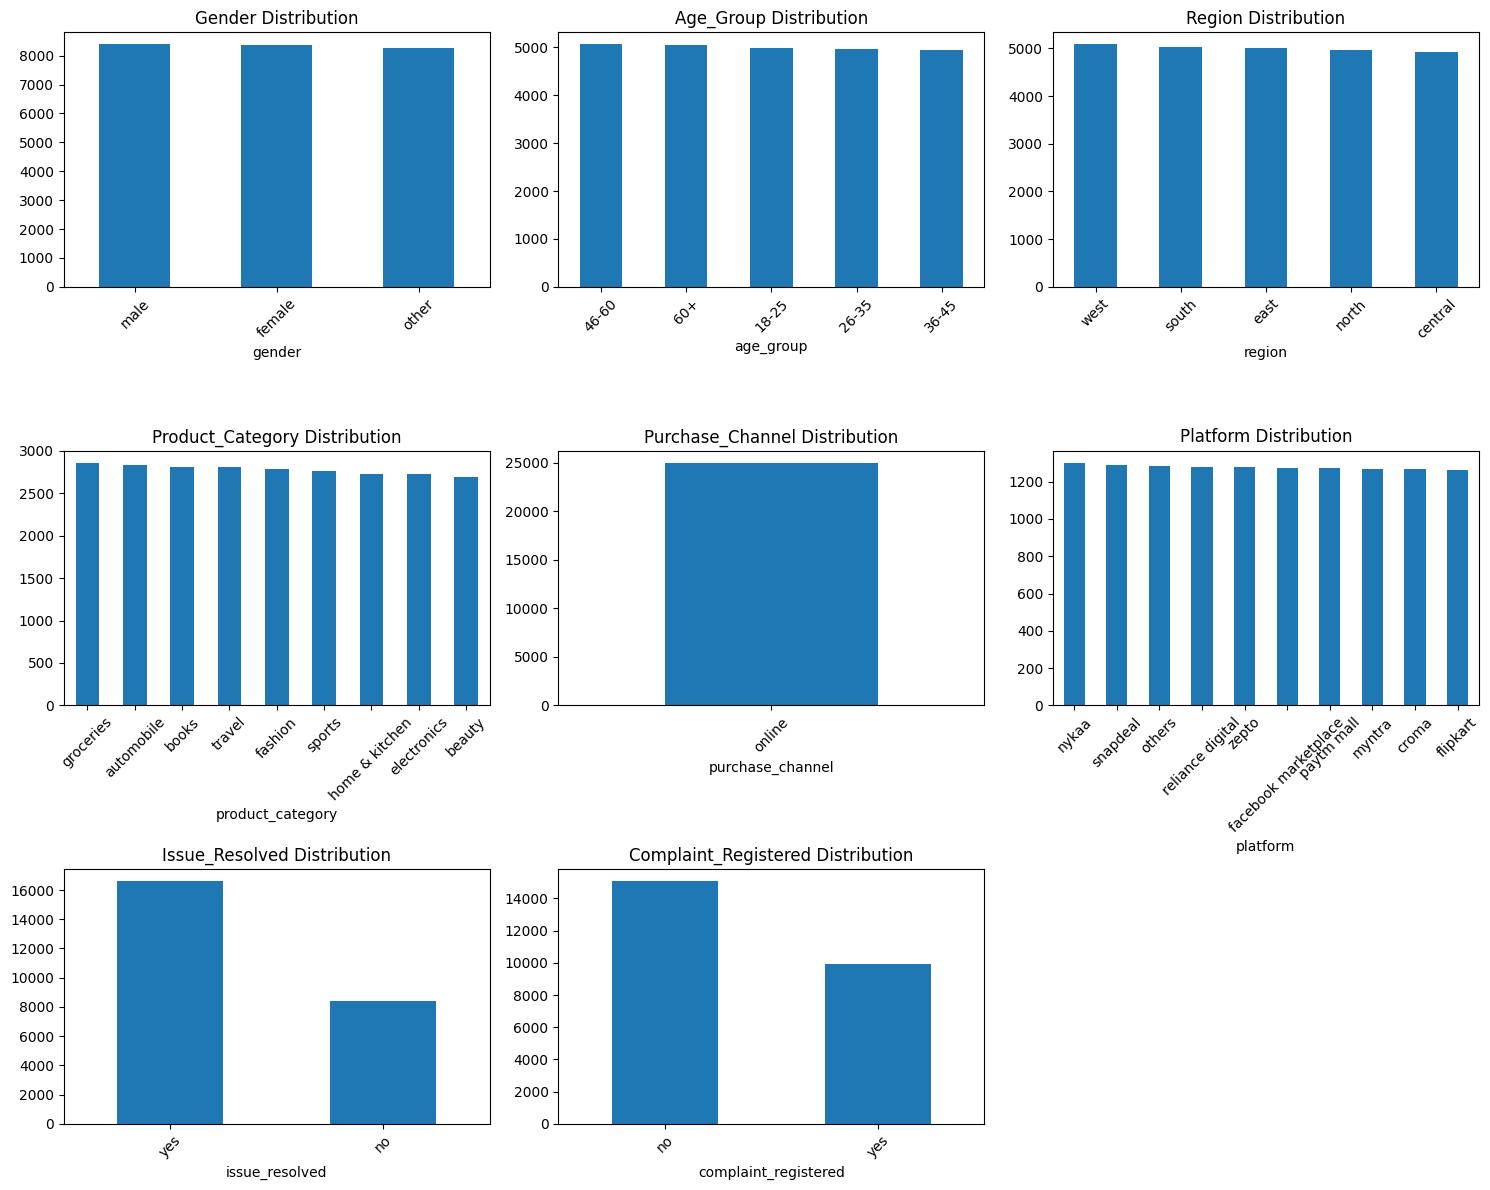

In [4]:
# Cell 4: Categorical features analysis
cat_cols = ['gender', 'age_group', 'region', 'product_category', 'purchase_channel', 'platform', 'issue_resolved', 'complaint_registered']

plt.figure(figsize=(15, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'{col.title()} Distribution')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


In [5]:
# Cell 5: Sentiment by key categorical features (Crosstabs)
print("=== SENTIMENT DISTRIBUTION BY KEY FEATURES ===")

key_features = ['gender', 'age_group', 'product_category', 'purchase_channel', 'issue_resolved', 'complaint_registered']
for feature in key_features:
    print(f"\n{feature.upper()} vs SENTIMENT:")
    crosstab = pd.crosstab(df[feature], df['sentiment'], normalize='index') * 100
    print(crosstab.round(1))
    print("-" * 50)


=== SENTIMENT DISTRIBUTION BY KEY FEATURES ===

GENDER vs SENTIMENT:
sentiment  negative  neutral  positive
gender                                
female         39.6     20.7      39.7
male           39.8     20.3      39.9
other          39.8     20.1      40.2
--------------------------------------------------

AGE_GROUP vs SENTIMENT:
sentiment  negative  neutral  positive
age_group                             
18-25          39.5     20.1      40.4
26-35          40.2     19.3      40.5
36-45          39.8     21.1      39.1
46-60          40.1     20.4      39.6
60+            39.2     20.8      40.0
--------------------------------------------------

PRODUCT_CATEGORY vs SENTIMENT:
sentiment         negative  neutral  positive
product_category                             
automobile            39.7     20.6      39.7
beauty                41.0     20.0      39.0
books                 40.6     20.7      38.7
electronics           38.9     20.0      41.1
fashion               41.3  

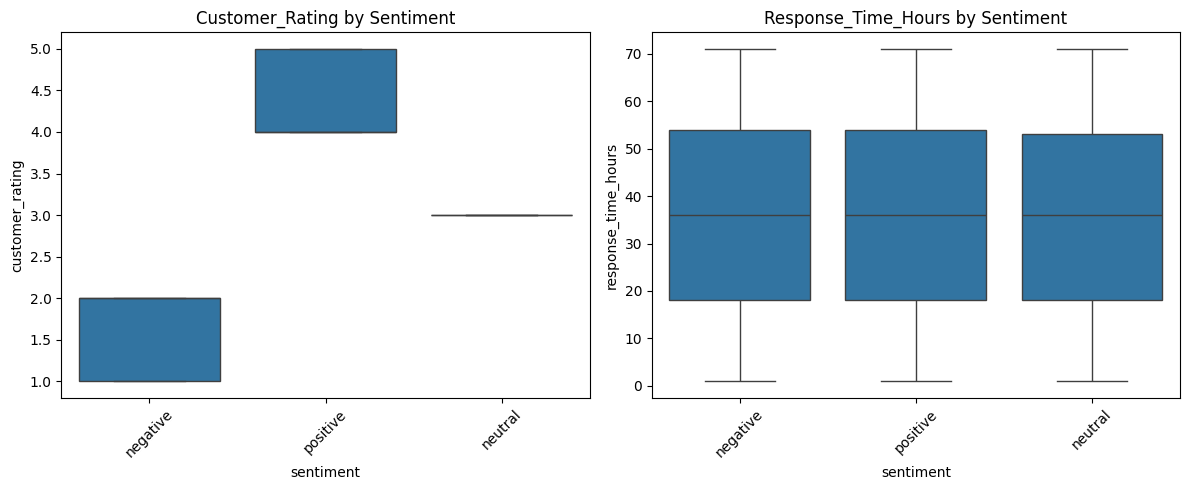

Numeric features statistics:
          customer_rating                                               \
                    count      mean       std  min  25%  50%  75%  max   
sentiment                                                                
negative           9937.0  1.507799  0.499964  1.0  1.0  2.0  2.0  2.0   
neutral            5085.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0   
positive           9978.0  4.492283  0.499965  4.0  4.0  4.0  5.0  5.0   

          response_time_hours                                               \
                        count       mean        std  min   25%   50%   75%   
sentiment                                                                    
negative               9937.0  36.022240  20.488352  1.0  18.0  36.0  54.0   
neutral                5085.0  36.086922  20.385716  1.0  18.0  36.0  53.0   
positive               9978.0  35.992383  20.815222  1.0  18.0  36.0  54.0   

                 
            max  
sentiment        
neg

In [6]:
# Cell 6: Numeric features analysis
numeric_cols = ['customer_rating', 'response_time_hours']

plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=df, x='sentiment', y=col)
    plt.title(f'{col.title()} by Sentiment')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Numeric features statistics:")
print(df[numeric_cols + ['sentiment']].groupby('sentiment').describe())


=== CORRELATION MATRIX ===


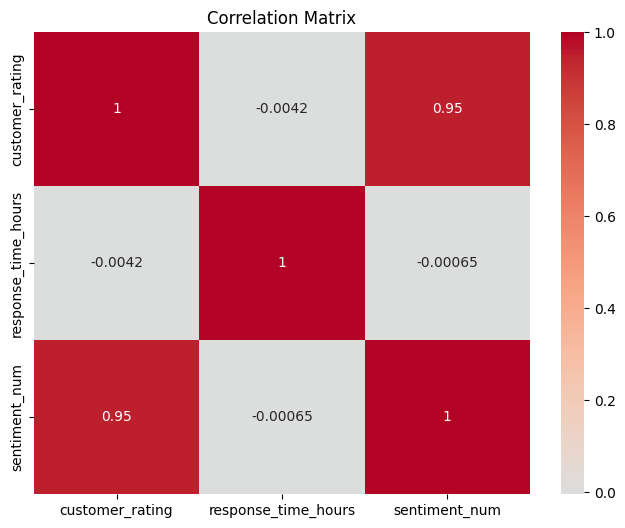


Review text insights:
Average review length by sentiment:
            mean   std  min  max
sentiment                       
negative   31.49  6.38   20   39
neutral    30.85  4.02   26   37
positive   33.25  6.34   22   41

Most common platforms by sentiment:
sentiment             negative  neutral  positive
platform                                         
ajio                       480      247       507
amazon                     460      235       477
bigbasket                  510      232       488
boat                       472      268       517
croma                      526      254       486
facebook marketplace       483      280       509
flipkart                   543      251       470
jiomart                    485      267       488
lenskart                   492      269       480
meesho                     492      247       501


In [8]:
# Cell 7: Correlation analysis and review text insights
print("=== CORRELATION MATRIX ===")
corr_cols = ['customer_rating', 'response_time_hours']
corr_df = df[corr_cols].copy()
corr_df['sentiment_num'] = df['sentiment'].map({'positive': 2, 'neutral': 1, 'negative': 0})

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

print("\nReview text insights:")
print("Average review length by sentiment:")
df['review_length'] = df['review_text'].str.len()
print(df.groupby('sentiment')['review_length'].agg(['mean', 'std', 'min', 'max']).round(2))

print("\nMost common platforms by sentiment:")
platform_sentiment = df.groupby(['platform', 'sentiment']).size().unstack(fill_value=0)
print(platform_sentiment.head(10))

In [9]:
# Cell 8: Classification task summary
print("=== CLASSIFICATION TASK SUMMARY ===")
print(f"✓ Target: '{target_col}' (3 classes: positive, neutral, negative)")
print(f"✓ Dataset size: {len(df):,} samples")
print(f"✓ Features: {len(df.columns)-1} total, {sum(df.dtypes=='object')-1} categorical, {sum(df.dtypes!='object')} numeric")
print(f"✓ Class distribution: {dict(sentiment_counts)}")
print(f"✓ Recommended preprocessing: Handle class imbalance, text preprocessing, categorical encoding")

print("\nNext steps for modeling:")
print("- Text preprocessing (TF-IDF, word embeddings)")
print("- Handle class imbalance (SMOTE, undersampling)")
print("- Feature engineering (review length, sentiment strength)")
print("- Models: Logistic Regression, Random Forest, XGBoost, LSTM/Transformers")


=== CLASSIFICATION TASK SUMMARY ===
✓ Target: 'sentiment' (3 classes: positive, neutral, negative)
✓ Dataset size: 25,000 samples
✓ Features: 13 total, 9 categorical, 4 numeric
✓ Class distribution: {'positive': np.int64(9978), 'negative': np.int64(9937), 'neutral': np.int64(5085)}
✓ Recommended preprocessing: Handle class imbalance, text preprocessing, categorical encoding

Next steps for modeling:
- Text preprocessing (TF-IDF, word embeddings)
- Handle class imbalance (SMOTE, undersampling)
- Feature engineering (review length, sentiment strength)
- Models: Logistic Regression, Random Forest, XGBoost, LSTM/Transformers
